<a href="https://colab.research.google.com/github/joaoVittorDevv/An-lise-de-dados-Airbnb---Praga/blob/main/Analisando_os_Dados_do_Airbnb_Praga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Praga*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [46]:
!pip install geopandas

# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

%matplotlib inline


In [47]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/czech-republic/prague/prague/2021-09-24/visualisations/listings.csv')

## Análise dos Dados


In [48]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [49]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6785 non-null   int64  
 1   name                            6782 non-null   object 
 2   host_id                         6785 non-null   int64  
 3   host_name                       6770 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6785 non-null   object 
 6   latitude                        6785 non-null   float64
 7   longitude                       6785 non-null   float64
 8   room_type                       6785 non-null   object 
 9   price                           6785 non-null   int64  
 10  minimum_nights                  6785 non-null   int64  
 11  number_of_reviews               6785 non-null   int64  
 12  last_review                     58

**Dicionário das variáveis**

* id - Repesenta o identificador da entrada.
* name - Representa o nome dado a acomodação, pelo host.
* host_id - Identificador do host`(host é o proprietario, ou quem estão oferecendo a acomodação)`.
* host_name - Representa o nome do host.
* neighbourhood_group - Representa o grupo em que o bairro esta inserido.
* neighbourhood - Nome do bairro.
* latitude - Latitude geografica.
* longitude - Longitude geografica.
* room_type - Qual o tipo da acomodação.
* price - Qual o valor da acomodação.
* minimum_nights - Numero minimo de noites é aceito pela acomodação.
* number_of_reviews  - Quantos reviews a acomodação tem.
* last_review - Data em que o ultimo review foi feito.
* reviews_per_month - Numero de reviews por mẽs.
* calculated_host_listings_count - O número de listagens que o host possui no scrape atual, na geografia da cidade / região. 
* availability_365 - Numero de dias que a acomodação está disponivel nos proximos 365 dias, em alguns casos os dias podem estar reservados ou bloqueados pelo host.
* number_of_reviews_ltm - Numero de reviews nos ultimos 12 meses
* license - Numero de registro.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [50]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3884,Enjoy/relax/hide Old Town Prague,3128,Regina,NaN,Praha 1,50.08411,14.43047,Entire home/apt,1497,5,2,2012-07-13,0.02,1,0,0,NaN
1,23163,"Quiet 1BR directly in the Centre, Air-conditio...",5282,Klara,NaN,Praha 1,50.08229,14.41552,Entire home/apt,3709,1,21,2021-08-08,0.19,46,25,1,NaN
2,23169,M302-Cozy Serviced Studio in Center,5282,Klara,NaN,Praha 1,50.08830,14.42272,Entire home/apt,2490,1,84,2019-04-30,0.75,46,46,3,NaN
3,26755,Central Prague Old Town Top Floor,113902,Daniel+Bea,NaN,Praha 1,50.08729,14.43179,Entire home/apt,2030,3,253,2020-01-05,3.31,2,40,1,NaN
4,27916,Cosy & Quiet Studio - Romantic Stay in Zizkov,120384,Hana,NaN,Praha 3,50.08152,14.45750,Entire home/apt,1079,2,413,2020-01-02,3.53,3,87,0,NaN


Utilizando o `describe()` para obter as informações estatisticas da coluna `number_of_reviews`

In [51]:
df.number_of_reviews.describe()

count    6785.000000
mean       53.116581
std        82.798701
min         0.000000
25%         2.000000
50%        16.000000
75%        69.000000
max       731.000000
Name: number_of_reviews, dtype: float64

É também interessante obter a mediana dos dados através do método `median()`, para em comparação com o a média, ter uma idéia de como os outliers afetam os dados da distribuição

In [52]:
df.number_of_reviews.median()

16.0

Plotar um histograma é extremamente util para entender como se comporta a curva de cada distribuição

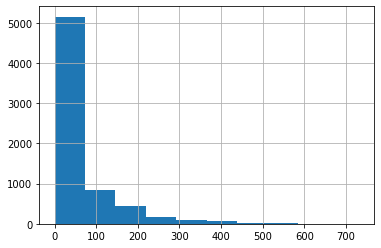

In [53]:
df.number_of_reviews.hist()

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [54]:
df.shape

(6785, 18)

In [55]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3884,Enjoy/relax/hide Old Town Prague,3128,Regina,NaN,Praha 1,50.08411,14.43047,Entire home/apt,1497,5,2,2012-07-13,0.02,1,0,0,NaN
1,23163,"Quiet 1BR directly in the Centre, Air-conditio...",5282,Klara,NaN,Praha 1,50.08229,14.41552,Entire home/apt,3709,1,21,2021-08-08,0.19,46,25,1,NaN
2,23169,M302-Cozy Serviced Studio in Center,5282,Klara,NaN,Praha 1,50.08830,14.42272,Entire home/apt,2490,1,84,2019-04-30,0.75,46,46,3,NaN
3,26755,Central Prague Old Town Top Floor,113902,Daniel+Bea,NaN,Praha 1,50.08729,14.43179,Entire home/apt,2030,3,253,2020-01-05,3.31,2,40,1,NaN
4,27916,Cosy & Quiet Studio - Romantic Stay in Zizkov,120384,Hana,NaN,Praha 3,50.08152,14.45750,Entire home/apt,1079,2,413,2020-01-02,3.53,3,87,0,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [56]:
100*(df.isna().sum()/ df.shape[0])


id                                  0.000000
name                                0.044215
host_id                             0.000000
host_name                           0.221076
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        14.340457
reviews_per_month                  14.340457
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

Com está fórmula podemos verificar qual porcentagem cada coluna tem de dados faltantes, para assim conseguirmos tratar esses dados de forma adequada. No caso as colunas `neighbourhood_group` e `license` saltam aos olhos de cara, por possuirem 100% dos dados ausentes

### **Q3. Qual o tipo de distribuição das variáveis?** 

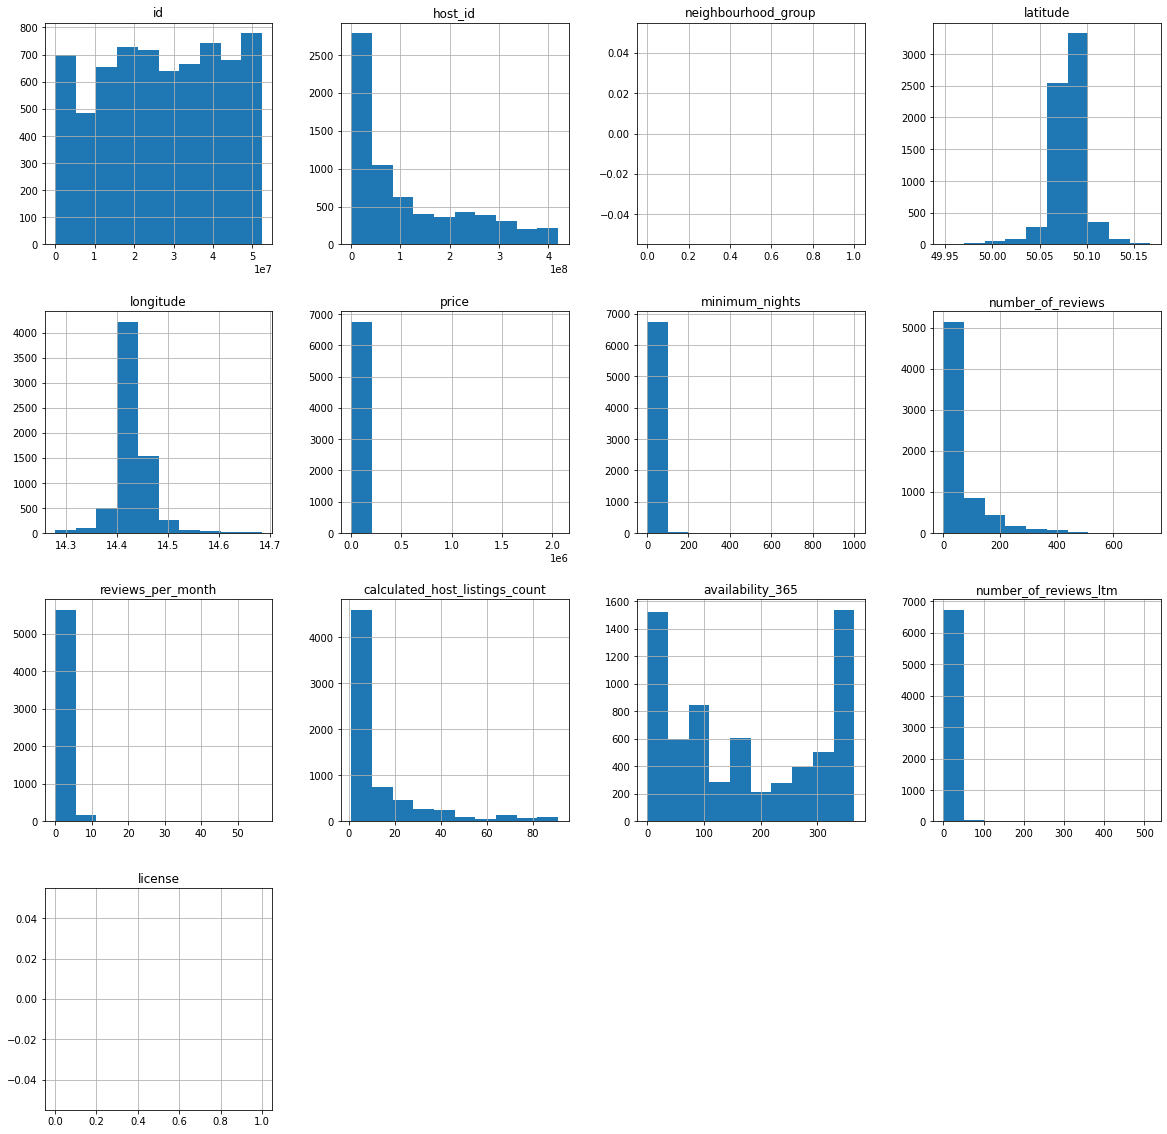

In [57]:
df.hist(figsize = (20,20));


Nos histogramas de todas as colunas do dataset podemos observar que as colunas `price`, `minimum_nights`, `reviews_per_month`, `number_of_reviews_ltm` tem uma distribuição bem irregular, ou seja, não conseguimos desenhar uma curva a partir dela

### **Q4. Qual a média dos preços de aluguel?**

In [58]:
df.price.mean()

7636.763301400148

### **Q4. Qual a correlação existente entre as variáveis**

In [59]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [60]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

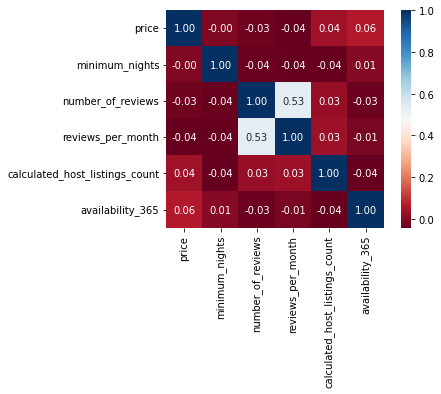

In [61]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Aqui podemos observar a correlação entre as variáveis numéricas do dataset, correlação é qualquer relação estatística (causal ou não causal) entre duas variáveis quantitativas, onde o grau de correlação é exprimido entre -1 e 1, sendo -1 extremamente negativa e 1 extremamente positiva -> [ref. completa](https://operdata.com.br/blog/coeficientes-de-correlacao/).

No nosso caso, podemos observar que as únicas colunas que possuem uma correlação significativa, são `number_of_reviews` e `reviews_per_month`.


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [62]:
df.room_type.value_counts()


Entire home/apt    5136
Private room       1291
Hotel room          261
Shared room          97
Name: room_type, dtype: int64

In [63]:
100*(df.room_type.value_counts() / df.shape[0])


Entire home/apt    75.696389
Private room       19.027266
Hotel room          3.846721
Shared room         1.429624
Name: room_type, dtype: float64

Dentro do contexto principal do dataset, que é o aluguel que acomodações, é interessante obter os dados do tipo de acomodação que é mais alugada, afim de compreender as preferências dos usúarios

### **Q6. Qual a localidade mais cara do dataset?**



In [64]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Praha 2      28542.948409
Praha 8      10341.110818
Kolovraty     4954.000000
Vinoř         4400.000000
Praha 16      4104.333333
Praha 1       3492.456965
Praha 7       2908.590476
Praha 21      2726.750000
Praha 3       2558.650880
Praha 10      2304.219298
Name: price, dtype: float64

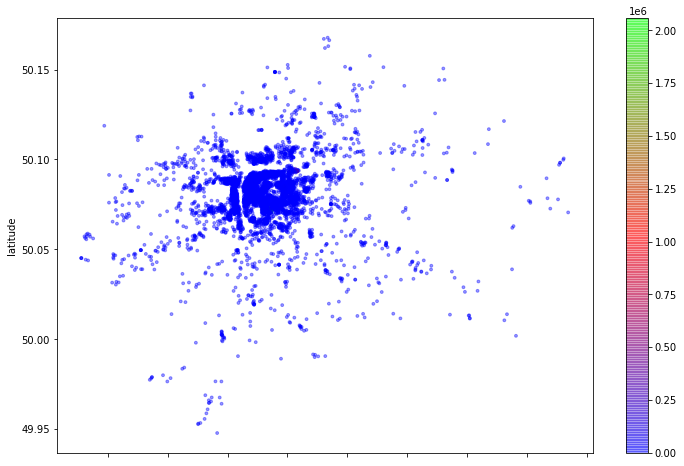

In [65]:

df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('brg'), figsize=(12,8));

Além de verificar qual o bairro mais caro do dataset, aqui podemos ver a distribuição dos imóveis na cidade

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [66]:
df.minimum_nights.mean()

4.9518054532056

In [67]:
df.minimum_nights.median()

2.0

In [68]:
df.minimum_nights.std()

37.20117819712723

Verificando o número médio de noites de aluguel e comparando com a mediana, podemos compreender que os outliers afetam de forma significativa os dados da distribuição, podemos constatar isso também com base no desvio padrão, que pelo contexto está com um valor bem elevado

### **Tratamento de dados ausentes.**


Observando a descrição estatística das colunas numéricas do dataset, para tratar dados ausentes que podem prejudicar as próximas etapas.

In [69]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.785000e+03,6785.000000,6785.000000,5812.000000,6785.000000,6785.000000
mean,7.636763e+03,4.951805,53.116581,1.641056,12.486514,173.207664
std,9.278644e+04,37.201178,82.798701,1.984703,18.532158,134.349899
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.060000e+03,1.000000,2.000000,0.330000,1.000000,51.000000
50%,1.580000e+03,2.000000,16.000000,1.000000,4.000000,157.000000
75%,2.588000e+03,2.000000,69.000000,2.422500,16.000000,320.000000
max,2.059174e+06,1000.000000,731.000000,56.690000,91.000000,365.000000


In [70]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].median()

price                             1580.0
minimum_nights                       2.0
number_of_reviews                   16.0
reviews_per_month                    1.0
calculated_host_listings_count       4.0
availability_365                   157.0
dtype: float64

Após uma análise dos dados, foi verificado que a coluna `reviews_per_month` apresenta dados ausentes.

In [71]:
df.loc[df.reviews_per_month == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


In [72]:
df.number_of_reviews.loc[df.number_of_reviews == 0].count()

973

Foi observado que dentro do contexto do dataset, nenhum dos dados não ausentes possui o valor 0, o que leva a conclusão que os dados ausentes provavelmente tem o valor 0, já que a coluna `number_of_reviews` que possui uma correlação relativa com a coluna em questão, apresenta o mesmo numero de valores 0, que os valores ausentes de `reviews_per_month`

In [73]:
df.reviews_per_month.fillna(0, inplace=True)

In [74]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.785000e+03,6785.000000,6785.000000,6785.000000,6785.000000,6785.000000
mean,7.636763e+03,4.951805,53.116581,1.405721,12.486514,173.207664
std,9.278644e+04,37.201178,82.798701,1.924825,18.532158,134.349899
min,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.060000e+03,1.000000,2.000000,0.120000,1.000000,51.000000
50%,1.580000e+03,2.000000,16.000000,0.750000,4.000000,157.000000
75%,2.588000e+03,2.000000,69.000000,2.090000,16.000000,320.000000
max,2.059174e+06,1000.000000,731.000000,56.690000,91.000000,365.000000


Também foi observado um grande outlier no Q4 das seguintes colunas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`.

### **Conclusão.**

Através de uma análise exploratória inicial, pode-se identificar algumas colunas com distribuição irregular e outliers.

Também foram verificados dados ausentes em 4 colunas, sendo os dados faltantes da coluna `reviews_per_month` constatados como 0 e assim tratados na mesma.

Com o dataset também é possível identificar a preferência dos usuários por *Entire home/apt*, representando 75.69% das locações. E também a distribuição dos imóveis, focada principalmente em uma região só. 